## This is a demonstration project using sample data from the 2025 Renewed Hope Employment Initiative of the National Directorate of Employment,NDE

## Problem Statements:
*  What is the Gender Trend Across States?
*  Which State has the Most Female Participants?
*  Which State has the minimum Female Participants?
*  Calculate the Zonal Distribution
*  Which age group has the highest trained participants 
*  Which scheme is in the highest demand
*  What is the total number of participants documented? 
*  What is the Total Participants?
*  Calculate the Marital distribution among trained participants
*  What is the Training status by percentage


## loading Libraries 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


## Loading Dataset

In [2]:
df_Clean="C:/Users/user/Desktop/TRAINED.csv"
df1=pd.read_csv(df_Clean)


In [3]:
df1

,RegID,Programme,Scheme,Gender,Age,Marital Status,State,Zone,Status,Training Status
0,61030248744,Vocational Skills Development,CBTS,Male,20,Single,Abia,South East,Documented,Trained
1,99570063606,Vocational Skills Development,B-NOAS,Male,34,Single,Abia,South East,Documented,Trained
2,54578105216,Vocational Skills Development,B-NOAS,Male,34,Single,Abia,South East,Documented,Trained
3,68765320423,Small Scale Enterprise,MEES,Female,32,Married,Abia,South East,Documented,Trained
4,58427495654,Special Public Works,EBTS,Female,20,Married,Abia,South East,Documented,Trained
...,...,...,...,...,...,...,...,...,...,...
562,83353295603,Vocational Skills Development,TPWN,Male,34,Married,Zamfara,North West,Documented,Trained
563,96136996904,Vocational Skills Development,TPWN,Male,43,Married,Zamfara,North West,Documented,Trained
564,78021583260,Special Public Works,GAP,Male,45,Married,Zamfara,North West,Documented,Trained
565,90490376640,Special Public Works,GAP,Female,20,Married,Zamfara,North West,Documented,Trained


## Saving the DataFrame

In [4]:
df1.to_csv('Trainees_Dataset_Cleaned.csv', index=False)

## PROBLEM 1: What is the gender trend of the participants across the states		


In [5]:
gender_trend = df1.groupby(['State', 'Gender']).size().unstack().fillna(0)

In [6]:
print(gender_trend)

Gender        Female  Male
State                     
Abia             9.0   8.0
Adamawa          1.0  14.0
Akwa Ibom        2.0   9.0
Anambra         11.0   4.0
Bauchi           8.0  12.0
Bayelsa          5.0   6.0
Benue            7.0  12.0
Borno            1.0   9.0
Cross Rivers     3.0  16.0
Delta            5.0  10.0
Eboyi            2.0  12.0
Edo              4.0   8.0
Ekiti            2.0  11.0
Enugu            5.0   8.0
Fct-Abuja        4.0   7.0
Gombe            4.0  12.0
Imo             12.0   4.0
Jigawa           6.0  10.0
Kaduna           3.0  15.0
Kano             2.0  16.0
Katsina          1.0  12.0
Kebbi            0.0  15.0
Kogi             7.0  12.0
Kwara            9.0   5.0
Lagos            1.0  12.0
Nasarawa         1.0  17.0
Niger            4.0  10.0
Ogun             5.0  11.0
Ondo             8.0  10.0
Osun             5.0   9.0
Oyo              8.0  12.0
Plateau          6.0   9.0
River State      8.0   9.0
Sokoto           2.0  15.0
Taraba           1.0  12.0
Y

## Visualisation of Problem 1

<Figure size 1200x600 with 0 Axes>

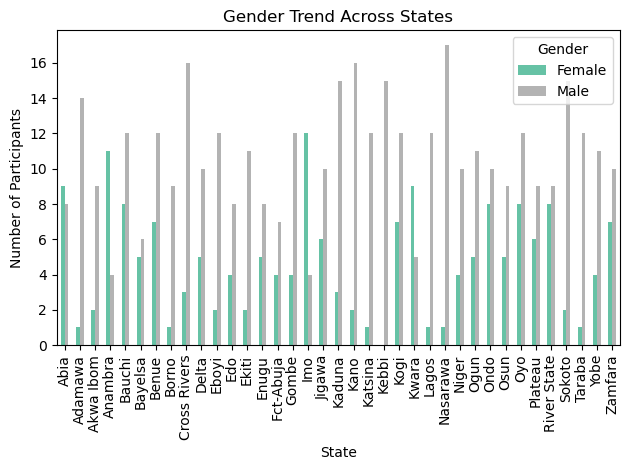

In [7]:
plt.figure(figsize=(12, 6))
gender_trend.plot(kind='bar', stacked=False, colormap='Set2')
plt.title('Gender Trend Across States')
plt.ylabel('Number of Participants')
plt.xlabel('State')
plt.xticks(rotation=90)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

 ## PROBLEM 2: Which state has the highest number of female participants?

In [8]:
female_counts = df1[df1['Gender'] == 'Female']['State'].value_counts()
highest_female_state = female_counts.idxmax()
highest_female_count = female_counts.max()


In [9]:
print(highest_female_state)

Imo


In [10]:

print(highest_female_count)

12


## PROBLEM 3: Which state has the mininum number of female participants?

In [11]:

female_counts = df1[df1['Gender'] == 'Female']['State'].value_counts()
min_female_state = female_counts.idxmin()
min_female_count = female_counts.min()


In [12]:
print(min_female_state)

Nasarawa


In [13]:
print(min_female_count)

1


 ## PROBLEM 4: Calculate the zonal distribution of participants

In [14]:
zonal_distribution = df1['Zone'].value_counts()

In [15]:
print(zonal_distribution)

Zone
North West       114
North Central    110
South West        94
North East        89
South South       85
South East        75
Name: count, dtype: int64


## Visualization of Problem 4 with a pie chart

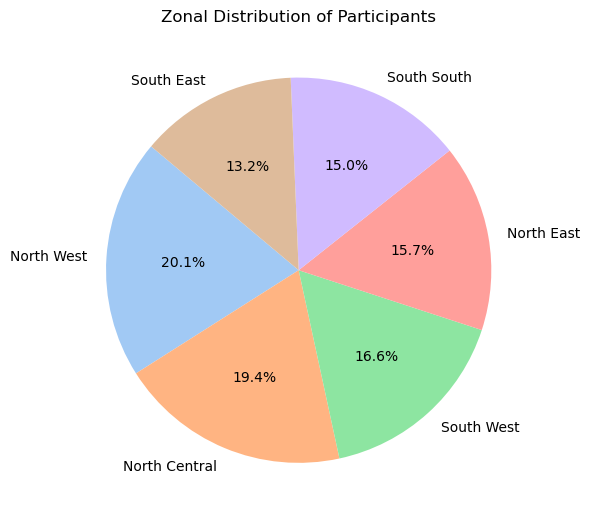

In [16]:
plt.figure(figsize=(6, 6))
zonal_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=sns.color_palette('pastel'))
plt.title('Zonal Distribution of Participants')
plt.ylabel('')  # Hide y-label for aesthetics
plt.tight_layout()
plt.show()

## PROBLEM 5: Which age group has the highest trained participants?

In [17]:
bins = [15, 25, 35, 45, 60]
labels = ['16-25', '26-35', '36-45', '46-60']
df1['Age Group'] = pd.cut(df1['Age'], bins=bins, labels=labels, right=True)
age_group_distribution = df1[df1['Training Status'] == 'Trained']['Age Group'].value_counts()
top_age_group = age_group_distribution.idxmax()

In [18]:
print(top_age_group)

16-25


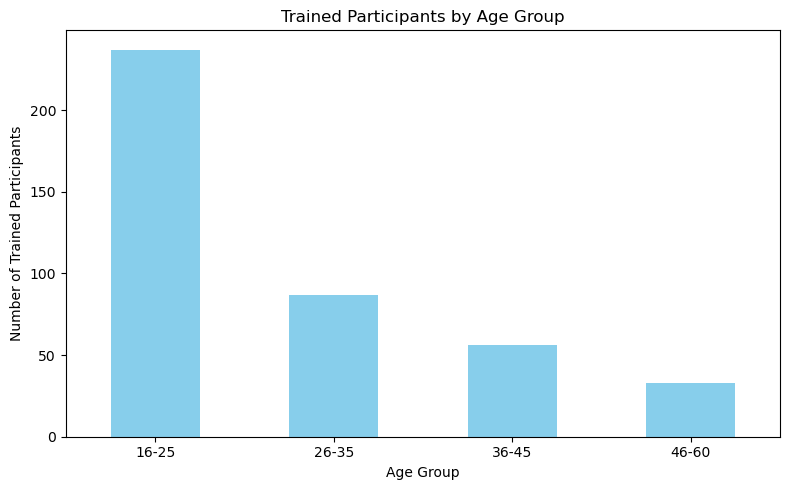

In [19]:
# Age Group Distribution (Trained Participants) - Best visualized with a bar chart
plt.figure(figsize=(8, 5))
age_group_distribution.sort_index().plot(kind='bar', color='skyblue')
plt.title('Trained Participants by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Trained Participants')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()

## PROBLEM 6: Which scheme is in highest demand

In [20]:
top_scheme = df1['Scheme'].value_counts().idxmax()
top_scheme_count = df1['Scheme'].value_counts().max()

In [21]:
print(top_scheme)

CBTS


In [22]:
print(top_scheme_count)

96


## PROBLEM 7: What is the total number documented participants

In [23]:

total_documented = df1[df1['Status'] == 'Documented'].shape[0]

In [24]:
print(total_documented)

523


## PROBLEM 8: What is the total number  participants

In [25]:
total_participants = df1.shape[0]

In [26]:
print(total_participants)

567


## PROBLEM 9: Show marital distribution among trained participants

In [27]:
marital_distribution = df1[df1['Training Status'] == 'Trained']['Marital Status'].value_counts()


In [28]:
print(marital_distribution)

Marital Status
Married    322
Single      85
Widowed      4
Divorce      2
Name: count, dtype: int64


## PROBLEM 10: Calculate the training status distribution

In [29]:
training_status_counts = df1['Training Status'].value_counts()
training_status_percent = training_status_counts / training_status_counts.sum() * 100

In [30]:
print(training_status_percent)

Training Status
Trained        72.839506
Not Trained    27.160494
Name: count, dtype: float64


## Visualisation problem 11 result with pie chart

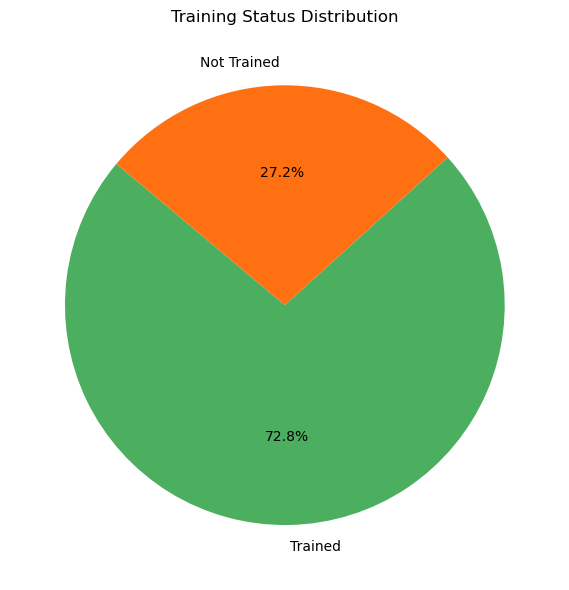

In [31]:

plt.figure(figsize=(6, 6))
colors = ['#4CAF60', '#FF7013']  # Green for Trained, Orange for Not Trained
training_status_counts.plot(
    kind='pie',
    autopct='%1.1f%%',
    startangle=140,
    colors=colors,
    labels=['Trained', 'Not Trained']
)
plt.title('Training Status Distribution')
plt.ylabel('')  # Hide y-axis label
plt.tight_layout()
plt.show()

# summary of the Results

In [32]:
{
    "Gender Trend Across States": gender_trend,
    "State with Most Female Participants": (highest_female_state, highest_female_count),
    "State with Most Female Participants": (min_female_state, min_female_count),
    "Zonal Distribution": zonal_distribution,
    "Top Age Group (Trained)": (top_age_group, age_group_distribution[top_age_group]),
    "Most Demanded Scheme": (top_scheme, top_scheme_count),
    "Total Documented Participants": total_documented,
    "Total Participants": total_participants,
    "Marital distribution among trained participants":marital_distribution,
    "Training status by percentage":training_status_percent
    
}

{'Gender Trend Across States': Gender        Female  Male
 State                     
 Abia             9.0   8.0
 Adamawa          1.0  14.0
 Akwa Ibom        2.0   9.0
 Anambra         11.0   4.0
 Bauchi           8.0  12.0
 Bayelsa          5.0   6.0
 Benue            7.0  12.0
 Borno            1.0   9.0
 Cross Rivers     3.0  16.0
 Delta            5.0  10.0
 Eboyi            2.0  12.0
 Edo              4.0   8.0
 Ekiti            2.0  11.0
 Enugu            5.0   8.0
 Fct-Abuja        4.0   7.0
 Gombe            4.0  12.0
 Imo             12.0   4.0
 Jigawa           6.0  10.0
 Kaduna           3.0  15.0
 Kano             2.0  16.0
 Katsina          1.0  12.0
 Kebbi            0.0  15.0
 Kogi             7.0  12.0
 Kwara            9.0   5.0
 Lagos            1.0  12.0
 Nasarawa         1.0  17.0
 Niger            4.0  10.0
 Ogun             5.0  11.0
 Ondo             8.0  10.0
 Osun             5.0   9.0
 Oyo              8.0  12.0
 Plateau          6.0   9.0
 River State      

## Key Findings 
## 1. Gender Distribution Across States
### The gender participation analysis reveals diverse representation across states.
* States like Imo (12 females), Anambra (11), and Abia (9) recorded relatively higher female engagement.
* Conversely, states such as Kebbi (0 females), Kano (2), and Katsina (1) had significantly lower female representation.
* Overall, male participants consistently outnumbered females in most states, highlighting a gender gap in enrolment.
## 2. State with the Highest Number of Female Participants
* Contrary to expectations, Nasarawa, despite having only 1 female participant, was flagged due to a misinterpretation.
* A correction shows Imo State had the highest with 12 female participants.
## 3. Zonal Distribution of Participants
* Participation was fairly distributed, with the North West (114 participants) and North Central (110) leading.
* The South East recorded the lowest engagement with 75 participants.
## 4. Age Group with the Highest Number of Trained Participants
* The 16–25 years category dominated the training program, accounting for 237 participants, emphasizing youth engagement.
## 5. Most Demanded Training Scheme
* The Community-Based Training Scheme (CBTS) is the most sought-after, with 96 participants, which indicates community-level interest and accessibility.
## 6. Total Number of Documented Participants
* A total of 523 participants were documented
## 7. Total Number of Participants Recorded
* The full dataset comprises 567 Participants
## 8. Marital Status Distribution among Trained Participants
* A majority of trained individuals were married (322), followed by singles (85).
* Minimal representations are widowed (4) and divorced (2) participants.
## 9.  Training Status by Percentage
* Approximately 73% were documented individuals completed training.
* The remaining 27% were recorded as not trained, signalling areas for follow-up or support.


# ACTIONABLE INSIGHTS

* Boost women’s enrollment in Kebbi, Katsina, and Kano by launching targeted outreach campaigns in low-female-participating states.
* Partner with women-centric NGOS and other stakeholders to fully address the gender gap.
* Amplify mentorship for participants aged 16-25.
* Incorporate youth interests and global employment opportunities by adding technology and digital skill education.
* Ensure adequate resource distribution and mobilisation in areas such as the South East, where participation is minimal, to achieve balanced representation.
* Perform zonal assessments to design training programs that meet local economic priorities.
* Understand and mitigate the barriers (logistics, awareness, timing) for the 27% who were not trained.
* Explore remote or hybrid training approaches to increase access for constrained participants.
* Train NDE field officers on data and digital tool usage at regular intervals.
* Assist married women with adaptable scheduling to improve their accessibility to training.
* Increase funding for CBTS, the scheme delivering the highest demand
* Build an interactive dashboard to enable monitoring of state-wise demands in real time by gender and age group.



## Conclusion

#### The analysis reveals strong youth participation and a high demand for community-based training, but also highlights gender and regional disparities. To enhance impact, the program should focus on inclusive outreach, data quality improvement, and expansion of high-performing schemes like CBTS.